## 1. 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

In [2]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(font_list)

['C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NotoSansKR-Thin.ttf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\intelone-mono-font-family-regular.ttf', 'C:\\Windows\\Fonts\\SCHLBKI.TTF', 'C:\\Windows\\Fonts\\seguiemj.ttf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\1984대화나눔_소곤소곤.ttf', 'C:\\Windows\\Fonts\\HPSimplified_It.ttf', 'C:\\Windows\\Fonts\\NirmalaS.ttf', 'C:\\Windows\\Fonts\\LFAXI.TTF', 'C:\\Windows\\Fonts\\LFAX.TTF', 'C:\\Windows\\Fonts\\SCRIPTBL.TTF', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\HiMelody-Regular.ttf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Spoqa Han Sans Thin.ttf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\HakgyoansimSamulhamR.ttf', 'C:\\Program Files (x86)\\HP\\HP ICS\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf', 'C:\\Windows\\Fonts\\ROCC____.TTF', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Freesentation-4Regular.ttf', 'C:\\Win

In [3]:
df = pd.read_csv('1. 전처리 후 서울시 부동산 실거래가 정보.csv', encoding='utf-8')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556135 entries, 0 to 2556134
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   자치구명    object 
 1   법정동명    object 
 2   건물명     object 
 3   건축년도    float64
 4   층       float64
 5   건물용도    object 
 6   건물면적    float64
 7   물건금액    float64
 8   건축년도구분  object 
 9   층구분     object 
 10  건물면적구분  object 
dtypes: float64(4), object(7)
memory usage: 214.5+ MB


In [17]:
강서 = df[df['자치구명'] == '강서구']
중구 = df[df['자치구명'] == '중구']
송파 = df[df['자치구명'] == '송파구']

## 2. 가설 설정

1. 아파트의 건물가격이 가장 높을 것이다.  
   * '건물용도'별 '물건금액' 1위 == 아파트

2. 최근에 지어진 건물일수록 건물가격이 높을 것이다.  
   * '건축년도' 상승 -> '물건금액' 상승

3. 건물층수가 높을수록 건물가격이 높을 것이다.  
   * '층' 상승 -> '물건금액' 상승

4. 건물면적이 클수록 건물가격이 높을 것이다.  
   * '건물평수' 상승 -> '물건금액' 상승

## 3. 가설검증

### 3-1. 층과 물건금액의 상관관계

<function matplotlib.pyplot.show(close=None, block=None)>

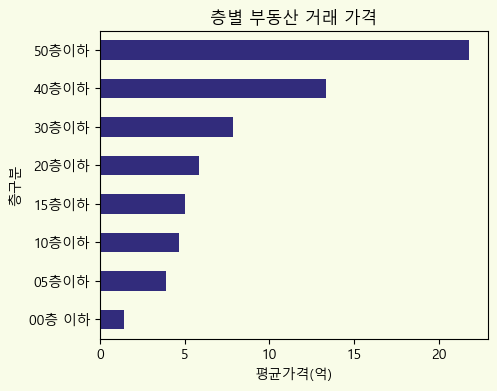

In [18]:
#층별 평균가격을 알기 위해서 df_floor에 할당 
df_floor = df.groupby('층구분')['물건금액'].mean()

#층별 건물평균가격을 보여주는 barh차트를 그려주는 코드 
fig=plt.figure(figsize=(5,4))
ax=df_floor.plot.barh(title='층별 부동산 거래 가격', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 
#층이 올라갈수록 전측 대비 증가폭이 커진다.

<function matplotlib.pyplot.show(close=None, block=None)>

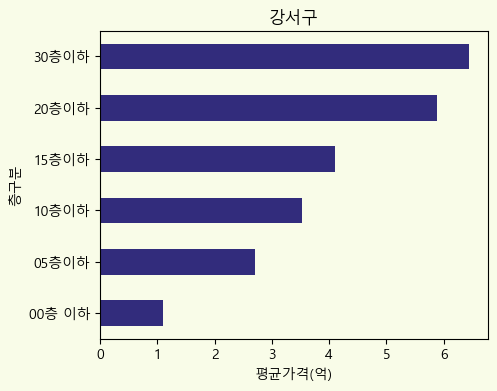

In [30]:
# 층별 평균가격을 알기 위해서 df_area에 할당 
강서_floor = 강서.groupby('층구분')['물건금액'].mean()
중구_floor = 중구.groupby('층구분')['물건금액'].mean()
송파_floor = 송파.groupby('층구분')['물건금액'].mean()

#건물면적별로 건물평균가격을 보여주는 barh차트
fig=plt.figure(figsize=(5,4))
ax=강서_floor.plot.barh(title='강서구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

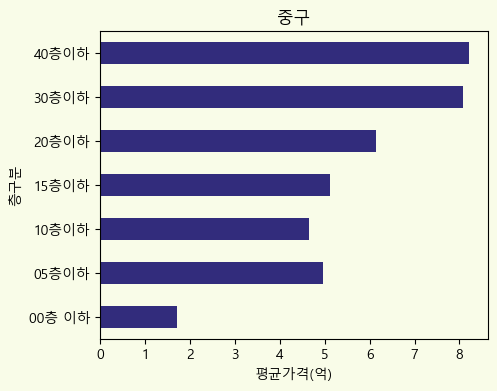

In [31]:
fig=plt.figure(figsize=(5,4))
ax=중구_floor.plot.barh(title='중구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 
#5층 이하에 단독다가구가 집중되어 튀는 값 발생

<function matplotlib.pyplot.show(close=None, block=None)>

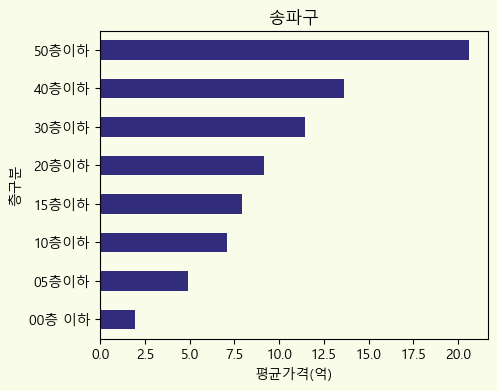

In [32]:
fig=plt.figure(figsize=(5,4))
ax=송파_floor.plot.barh(title='송파구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

### 3-2. 건물면적과 물건금액의 상관관계

<function matplotlib.pyplot.show(close=None, block=None)>

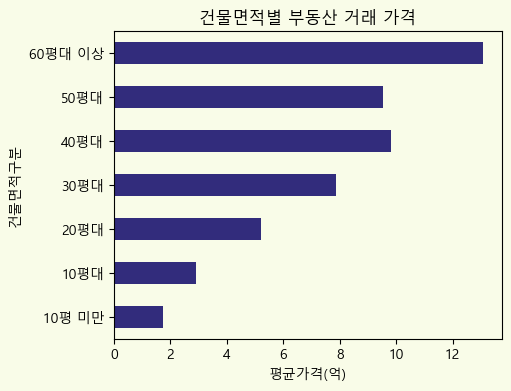

In [19]:
# 면적별 평균가격을 알기 위해서 df_area에 할당 
df_area = df.groupby('건물면적구분')['물건금액'].mean()

#건물면적별로 건물평균가격을 보여주는 barh차트
fig=plt.figure(figsize=(5,4))
ax=df_area.plot.barh(title='건물면적별 부동산 거래 가격', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

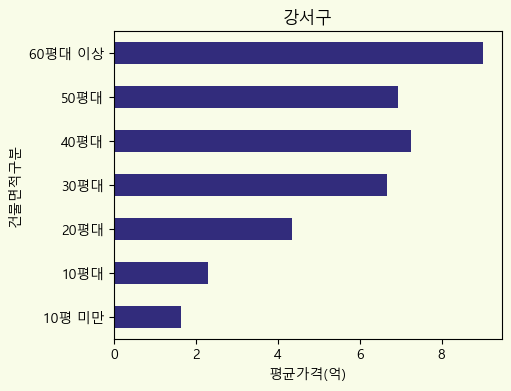

In [33]:
# 면적별 평균가격을 알기 위해서 df_area에 할당 
강서_area = 강서.groupby('건물면적구분')['물건금액'].mean()
중구_area = 중구.groupby('건물면적구분')['물건금액'].mean()
송파_area = 송파.groupby('건물면적구분')['물건금액'].mean()

#건물면적별로 건물평균가격을 보여주는 barh차트
fig=plt.figure(figsize=(5,4))
ax=강서_area.plot.barh(title='강서구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

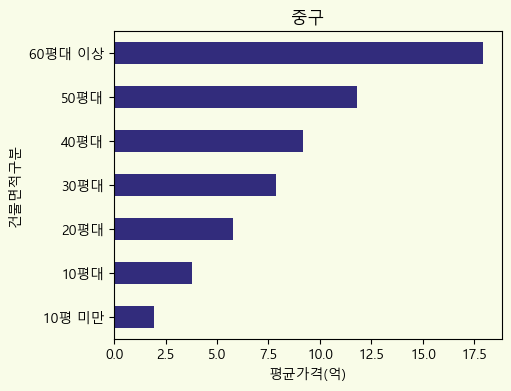

In [34]:
fig=plt.figure(figsize=(5,4))
ax=중구_area.plot.barh(title='중구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

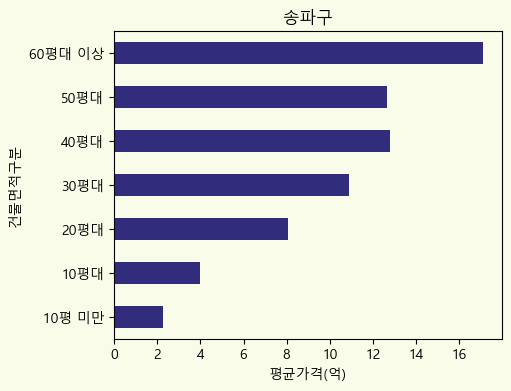

In [36]:
fig=plt.figure(figsize=(5,4))
ax=송파_area.plot.barh(title='송파구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

왜 50평대보다 40평대가 더 비쌀까?

<Figure size 1000x600 with 0 Axes>

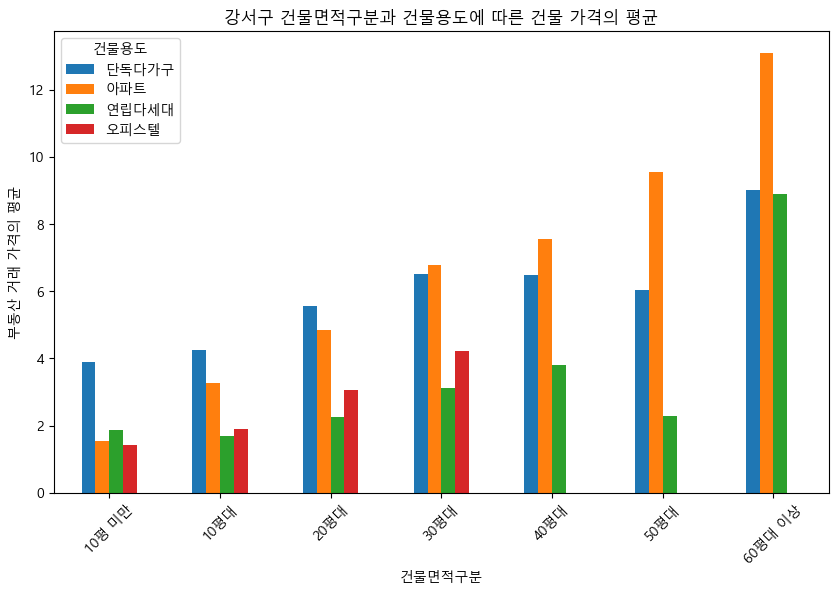

In [37]:
# 건물면적구분과 건물용도에 따른 부동산 거래 가격의 평균을 crosstab으로 계산
#그 특징이 뚜렷한 강서구의 자료에서 살펴보자!
ct = pd.crosstab(index=강서['건물면적구분'], columns=강서['건물용도'], values=강서['물건금액'], aggfunc='mean')

# 시각화
plt.figure(figsize=(10, 6))
ct.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('강서구 건물면적구분과 건물용도에 따른 건물 가격의 평균')
plt.xlabel('건물면적구분')
plt.ylabel('부동산 거래 가격의 평균')
plt.xticks(rotation=45)  # x축 레이블을 45도 회전하여 가독성 향상
plt.legend(title='건물용도')  # 범례 추가
plt.show() # 단독다가구라고 다 비싸진 않다. 

In [38]:
# 40평대, 50평대 변수 생성
df_40 = 강서[강서['건물면적구분']=='40평대'] 
df_50 = 강서[강서['건물면적구분']=='50평대']

# 건물면적구분에 따라 건물용도로 그룹화
df_40_grouped = df_40.groupby('건물용도')['건물용도'].count()
df_50_grouped = df_50.groupby('건물용도')['건물용도'].count()

In [39]:
df_40_grouped, df_50_grouped

(건물용도
 단독다가구     615
 아파트      1716
 연립다세대       9
 Name: 건물용도, dtype: int64,
 건물용도
 단독다가구    853
 아파트      290
 연립다세대      1
 Name: 건물용도, dtype: int64)

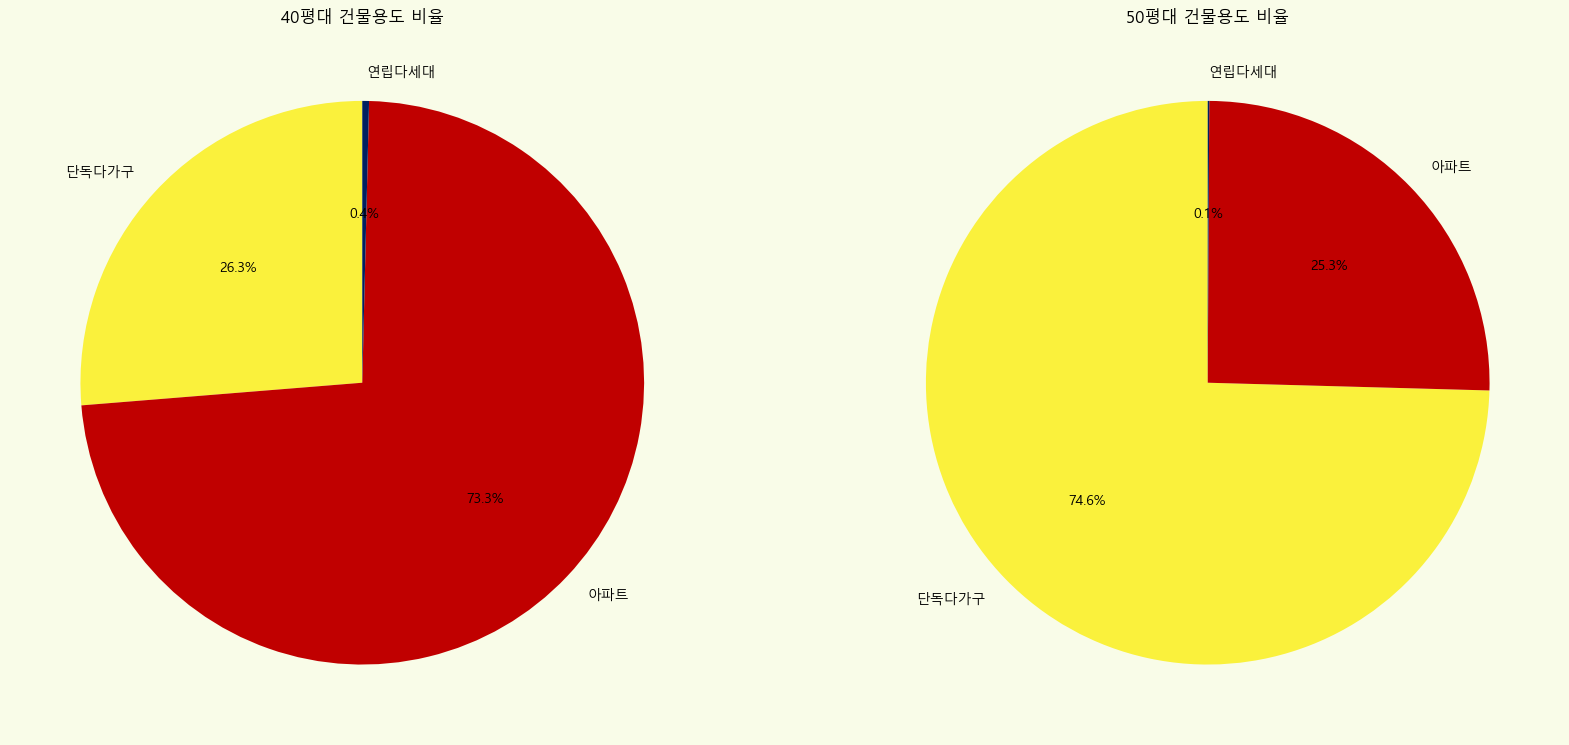

In [40]:
plt.figure(figsize=(20,10), facecolor='#F9FCE8')
colors = ['#FAF13C', '#C00000', '#002060', '#4EA72E']

# 첫 번째 서브플롯 (40평대)
plt.subplot(1, 2, 1)
plt.pie(df_40_grouped, labels=df_40_grouped.index, autopct='%1.1f%%', startangle=90, colors=colors)  # 색상 설정
plt.title('40평대 건물용도 비율')

# 두 번째 서브플롯 (50평대)
plt.subplot(1, 2, 2)
plt.pie(df_50_grouped, labels=df_50_grouped.index, autopct='%1.1f%%', startangle=90, colors=colors)  # 색상 설정
plt.title('50평대 건물용도 비율')

plt.show()

40평대 : 아파트 73.3% 단독다가구 26.3%
50평대 : 아파트 25.3% 단독다가구 74.6%

'건물면적구분과 건물용도에 따른 건물 가격의 평균'그림을 보면 40평대에서 50평대로 갈 때
단독다가구는 저렴해지는 반면 아파트는 비싸진다.
'저렴해지는' 단독다가구의 거래량 비율은 늘어나고
'비싸지는' 아파트의 거래량 비율은 줄어드므로

종합 평균치는 낮아진다.

### 3-3. 건물용도와 물건금액의 상관관계

<function matplotlib.pyplot.show(close=None, block=None)>

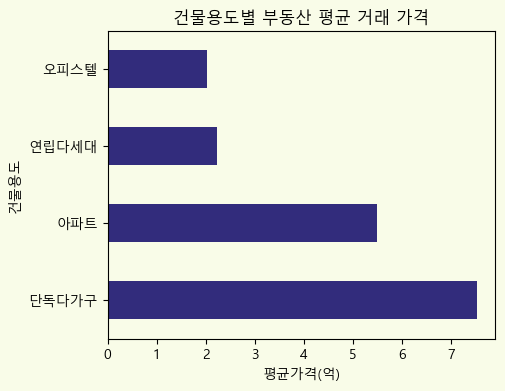

In [14]:
#건물용도별 평균가격을 알기 위해서 df_use에 할당 
df_use= df.groupby('건물용도')['물건금액'].mean()

#건물용도별 건물 가격의 평균을 보여주는 barh차트 
fig=plt.figure(figsize=(5,4))
ax = df_use.plot.barh(title='건물용도별 부동산 평균 거래 가격', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

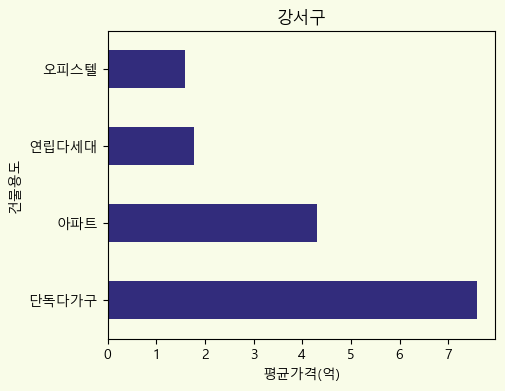

In [41]:
# 용도별 평균가격을 알기 위해서 df_use에 할당 
강서_use = 강서.groupby('건물용도')['물건금액'].mean()
중구_use = 중구.groupby('건물용도')['물건금액'].mean()
송파_use = 송파.groupby('건물용도')['물건금액'].mean()

#건물용도별로 건물평균가격을 보여주는 barh차트
fig=plt.figure(figsize=(5,4))
ax=강서_use.plot.barh(title='강서구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

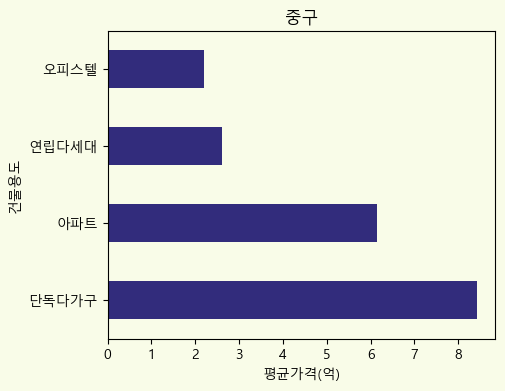

In [42]:
fig=plt.figure(figsize=(5,4))
ax=중구_use.plot.barh(title='중구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

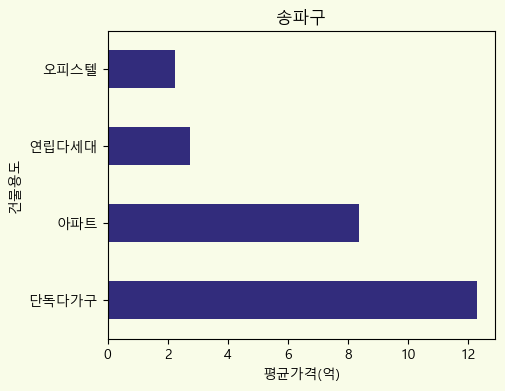

In [43]:
fig=plt.figure(figsize=(5,4))
ax=송파_use.plot.barh(title='송파구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

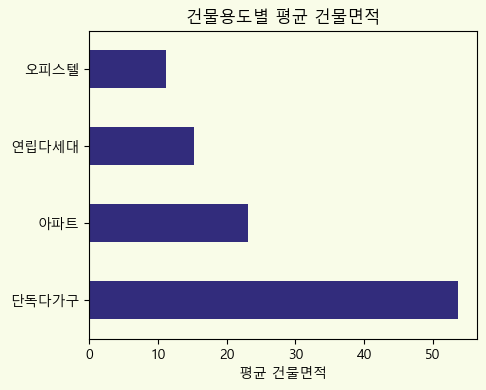

In [15]:
#건물용도별 평균평수을 알기 위해서 df_use에 할당 
use_area= df.groupby('건물용도')['건물면적'].mean()

#건물용도별 건물 가격의 평균을 보여주는 barh차트 
fig=plt.figure(figsize=(5,4))
ax = use_area.plot.barh(title='건물용도별 평균 건물면적', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균 건물면적')
plt.ylabel('')
plt.show

In [ ]:
# 면적별 평균가격을 알기 위해서 df_use에 할당 
강서_use = 강서.groupby('건물용도')['물건금액'].mean()
중구_use = 중구.groupby('건물용도')['물건금액'].mean()
송파_use = 송파.groupby('건물용도')['물건금액'].mean()

#건물용도별로 건물평균가격을 보여주는 barh차트
fig=plt.figure(figsize=(5,4))
ax=강서_use.plot.barh(title='강서구', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show 

용도별로 구분했을 땐 단독다가구, 아파트 / 연립다세대, 오피스텔 순으로 비싸다는 것을 알 수 있다.
그런데 건물 용도 별 평수가 위 그래프와 비슷한 양상을 띠는 것을 보아 
단독 다가구로서 분류되는 단독 주택이 큰 영향을 줄 수 있으며, 같은 순으로 평균 평수가 차이를 보여서 나타나는 차이점이라는 것을 예측할 수 있다.

### 3-4. 건축년도와 물건금액의 상관관계

<function matplotlib.pyplot.show(close=None, block=None)>

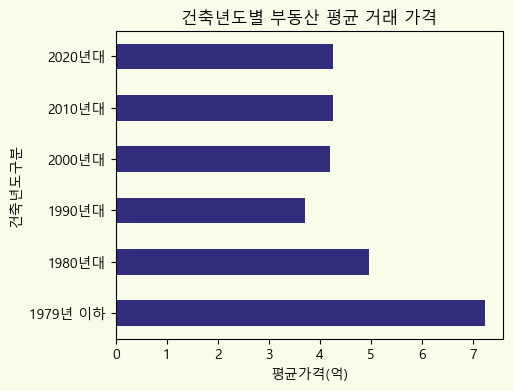

In [ ]:
# 건축년도별 평균가격을 알기 위해서 df_year에 할당 
df_year= df.groupby('건축년도구분')['물건금액'].mean()

# 건축년도별 건물평균가격을 보여주는 bar차트를 그려주는 코드 
fig=plt.figure(figsize=(5,4))
ax = df_year.plot.barh(title='건축년도별 부동산 평균 거래 가격', color='#322C7C')
fig.patch.set_facecolor('#F9FCE8')
ax.set_facecolor('#F9FCE8')
plt.xlabel('평균가격(억)')
plt.show

예상과는 달리 1980년 이전 부동산의 거래가격이 더 높다.
그 이유를 알아보기 위해 각각의 파이차트를 살펴보자.

In [ ]:
#'건축년도구분'마다 데이터프레임으로 할당해줌. 
df_under_1979 = df[df['건축년도구분']=='1979년 이하'].groupby('건물용도')['건물용도'].count()
df_1980 = df[df['건축년도구분']=='1980년대'].groupby('건물용도')['건물용도'].count()
df_1990 = df[df['건축년도구분']=='1990년대'].groupby('건물용도')['건물용도'].count()
df_2000 = df[df['건축년도구분']=='2000년대'].groupby('건물용도')['건물용도'].count()
df_2010 = df[df['건축년도구분']=='2010년대'].groupby('건물용도')['건물용도'].count()
df_2020 = df[df['건축년도구분']=='2020년대'].groupby('건물용도')['건물용도'].count()

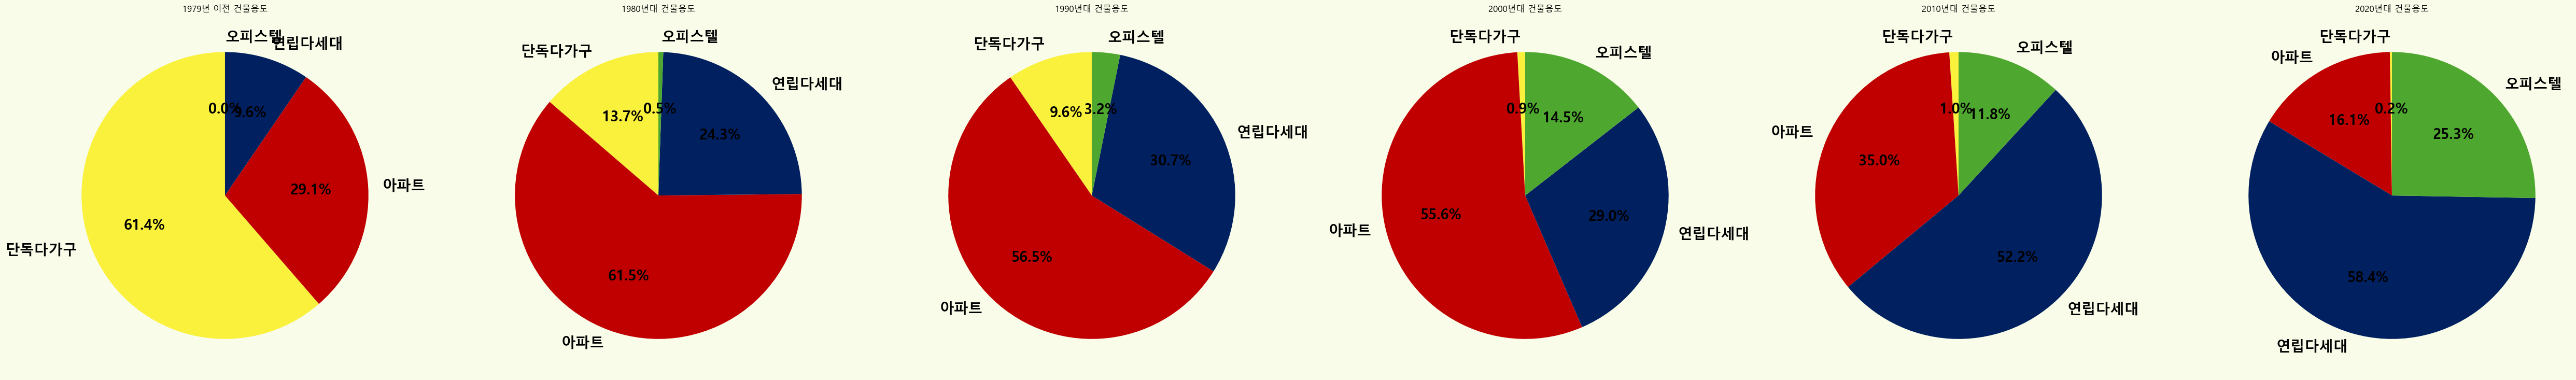

In [ ]:
plt.figure(figsize=(50,30), facecolor='#F9FCE8')
years= ['1979년 이전','1980년대','1990년대','2000년대','2010년대','2020년대']
dfname=[df_under_1979,df_1980, df_1990, df_2000, df_2010, df_2020]
colors = ['#FAF13C', '#C00000', '#002060', '#4EA72E']
#92D050
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.pie(dfname[i], labels=dfname[i].index, autopct='%1.1f%%', startangle=90, colors=colors,
            textprops={'fontsize':20, 'fontweight': 'bold'})
    plt.title(f'{years[i]} 건물용도')

plt.tight_layout()

plt.show()

#### 건축년도가 최신일 수록 건물가격이 오히려 낮은 이유

건물용도별 가격을 보면 오피스텔과, 연립다세대가 아파트, 단독다가구보다 가격이 싼데 

건축년도가 최신으로 올 수록 오피스텔과 연립다세대 비율이 늘어나고 
아파트, 단독다가구 비율은 점차 줄어들었기 때문이다.



#### 2000년대에서 2010년대로 넒어갈 때 오피스텔, 연립다세대가 단독다가구, 아파트보다 늘어난 이유

1) 1980년대에는 한국의 도시화가 완성되지 않은 상태  
2) 1980년대까지 가족 단위가 크고, 구조가 다양했음.  

따라서 그 당시 아파트의 선호도가 높았을 것이다. 

이어서 1970년대 잠실지구 개발, 88올림픽 유치 전 아파트 건설 증가, 최근 강남 3구 연립건축 붐 기사 참고. 

1970,1980년대 주거난 해결을 위해서, 송파에 많은 아파트 건설

![My Image](image/송파구주거난.png)

아파트 값의 증가로 인해 사람들이 최근 다세대와 연립주택으로 시선을 돌리는 중.

![My Image](image/강남3구_연립다세대붐.png)

![My Image](image/연립다세대거래량.png)

## 4. 집 찾기

### 4-1. 김유라

25~36 대략 12년 일하면...

컨설팅회사 취업 => 임원급 제외 평균 연봉 5000 예상

5000*12 = 60000

In [ ]:
김유라= 강서.query('건축년도>=2013 & 건물용도=="아파트" & 30<=건물면적<=39')
김유라[김유라['물건금액']<6]

,자치구명,법정동명,건물명,건축년도,층,건물용도,건물면적,물건금액,건축년도구분,층구분,건물면적구분
424789,강서구,마곡동,마곡엠밸리7단지,2014.0,14.0,아파트,34.693725,5.8939,2010년대,15층이하,30평대
425896,강서구,마곡동,마곡엠벨리(15단지),2014.0,1.0,아파트,34.745150,5.7500,2010년대,05층이하,30평대
426372,강서구,마곡동,마곡엠밸리2단지,2014.0,7.0,아파트,34.760275,5.8400,2010년대,10층이하,30평대
426425,강서구,마곡동,마곡엠밸리7단지,2014.0,5.0,아파트,34.745150,5.9500,2010년대,05층이하,30평대
426502,강서구,마곡동,마곡엠밸리5단지,2014.0,8.0,아파트,34.745150,5.9500,2010년대,10층이하,30평대
...,...,...,...,...,...,...,...,...,...,...,...
428972,강서구,마곡동,마곡엠밸리6단지,2014.0,11.0,아파트,34.781450,5.9000,2010년대,15층이하,30평대
428978,강서구,마곡동,마곡엠밸리7단지,2014.0,7.0,아파트,34.760275,5.7900,2010년대,10층이하,30평대
429004,강서구,마곡동,마곡엠밸리7단지,2014.0,8.0,아파트,34.760275,5.9000,2010년대,10층이하,30평대
429080,강서구,마곡동,마곡엠밸리5단지,2014.0,11.0,아파트,34.745150,5.5083,2010년대,15층이하,30평대


=> 마곡엠밸리 7단지 15층 40평대

### 4-2. 오창석

-> 26살 ~ 38살 13년동안 월급 300만원, 연봉 3600만원 저축 = 13(년) x 3600(만원) = 5억 400만원

In [ ]:
오창석= 강서.query('건축년도>=2010 & 건물용도=="아파트"& 층<=15 & 30<=건물면적<=39')
오창석[오창석['물건금액']<5]

,자치구명,법정동명,건물명,건축년도,층,건물용도,건물면적,물건금액,건축년도구분,층구분,건물면적구분
419993,강서구,화곡동,그랜드아이파크,2010.0,11.0,아파트,34.01915,4.8638,2010년대,15층이하,30평대
420660,강서구,화곡동,그랜드아이파크,2010.0,14.0,아파트,34.01915,4.8638,2010년대,15층이하,30평대
421496,강서구,화곡동,그랜드아이파크,2010.0,9.0,아파트,34.01915,4.8638,2010년대,10층이하,30평대
438578,강서구,염창동,강변월드메르디앙,2010.0,1.0,아파트,36.94130,4.9610,2010년대,05층이하,30평대


=> 강서구 그랜드아이파크 14층 아파트

### 4-3. 원예지

In [ ]:
원예지= 중구.query('30<=건물면적<=39 & 건축년도>=2004 & 2<=층<=10 & (건물용도 == "아파트" or 건물용도 == "연립다세대")')
원예지[원예지['물건금액']<24]

,자치구명,법정동명,건물명,건축년도,층,건물용도,건물면적,물건금액,건축년도구분,층구분,건물면적구분
2141812,중구,필동2가,젬스톤헤리티지,2022.0,3.0,연립다세대,32.204150,15.50,2020년대,05층이하,30평대
2141894,중구,신당동,청구e편한세상,2011.0,5.0,아파트,35.837175,15.00,2010년대,05층이하,30평대
2142319,중구,신당동,청구e편한세상,2011.0,7.0,아파트,35.788775,17.00,2010년대,10층이하,30평대
2142697,중구,중림동,브라운스톤서울,2006.0,10.0,아파트,35.616350,12.60,2000년대,10층이하,30평대
2142823,중구,황학동,황학아크로타워,2010.0,7.0,아파트,33.644050,12.00,2010년대,10층이하,30평대
...,...,...,...,...,...,...,...,...,...,...,...
2168392,중구,중림동,브라운스톤(355-0),2006.0,9.0,아파트,35.616350,8.70,2000년대,10층이하,30평대
2169868,중구,신당동,태원팰리스5차(432-1132),2006.0,5.0,아파트,32.869650,3.80,2000년대,05층이하,30평대
2170225,중구,신당동,삼성홈타운,2004.0,8.0,아파트,31.756450,3.70,2000년대,10층이하,30평대
2170551,중구,신당동,태원팰리스5차(432-1132),2006.0,6.0,아파트,32.869650,3.85,2000년대,10층이하,30평대


=> (432-1633) 2층(2014)

### 4-4. 이은진

In [ ]:
이은진= 중구.query('50<=건물면적<=60 & 건축년도>=2000 & 10<=층<=15 & 건물용도=="아파트"')
이은진[이은진['물건금액']<24]

,자치구명,법정동명,건물명,건축년도,층,건물용도,건물면적,물건금액,건축년도구분,층구분,건물면적구분
2143633,중구,회현동2가,쌍용남산플래티넘,2010.0,15.0,아파트,53.54250,23.5000,2010년대,15층이하,50평대
2143745,중구,회현동2가,쌍용남산플래티넘,2010.0,10.0,아파트,50.28760,18.5000,2010년대,10층이하,50평대
2144923,중구,회현동1가,남산롯데캐슬아이리스,2011.0,12.0,아파트,56.70060,18.8000,2010년대,15층이하,50평대
2145550,중구,회현동2가,쌍용남산플래티넘,2010.0,11.0,아파트,53.54250,18.5000,2010년대,15층이하,50평대
2146679,중구,회현동2가,쌍용남산플래티넘,2010.0,11.0,아파트,50.28760,14.5000,2010년대,15층이하,50평대
2146760,중구,회현동2가,쌍용남산플래티넘,2010.0,13.0,아파트,53.54250,18.4000,2010년대,15층이하,50평대
2147822,중구,회현동2가,쌍용남산플래티넘,2010.0,12.0,아파트,53.54250,17.0000,2010년대,15층이하,50평대
2147921,중구,회현동2가,쌍용남산플래티넘,2010.0,13.0,아파트,53.54250,16.7000,2010년대,15층이하,50평대
2148485,중구,회현동2가,쌍용남산플래티넘,2010.0,10.0,아파트,50.28760,14.3000,2010년대,10층이하,50평대
2148655,중구,회현동2가,쌍용남산플래티넘,2010.0,10.0,아파트,50.28760,14.3000,2010년대,10층이하,50평대


=> 중구	회현동2가 쌍용남산플래티넘	2010년	10층	아파트	50.28평	18.5억

### 4-5. 이용찬

In [ ]:
이용찬 = 송파.query('층<=15 & 30<=건물면적<=39 & 건물용도 == "아파트" & 2010<=건축년도<=2019')
이용찬[이용찬['물건금액'] < 5.2]

,자치구명,법정동명,건물명,건축년도,층,건물용도,건물면적,물건금액,건축년도구분,층구분,건물면적구분
1872269,송파구,마천동,송파파크데일1단지,2011.0,1.0,아파트,34.739100,5.1415,2010년대,05층이하,30평대
1872271,송파구,마천동,송파파크데일1단지,2011.0,1.0,아파트,34.739100,5.1415,2010년대,05층이하,30평대
1872554,송파구,마천동,송파파크데일1단지,2011.0,1.0,아파트,34.739100,5.1957,2010년대,05층이하,30평대
1872597,송파구,마천동,송파파크데일2단지,2011.0,1.0,아파트,34.760275,5.1684,2010년대,05층이하,30평대
1872625,송파구,마천동,송파파크데일2단지,2011.0,1.0,아파트,34.730025,4.9199,2010년대,05층이하,30평대
1873992,송파구,풍납동,금강캐스빌,2010.0,4.0,아파트,34.672550,4.5000,2010년대,05층이하,30평대
1877358,송파구,풍납동,금강캐스빌,2010.0,6.0,아파트,33.008800,5.1600,2010년대,10층이하,30평대


In [ ]:
min_value = 이용찬['물건금액'].min() ;min_value

4.5

### 4-6. 오준호

In [ ]:
오준호 = 송파.query('층<=10 & 20<=건물면적<=29 & 건물용도=="오피스텔" & 2010<= 건축년도 <=2019')
오준호[오준호['물건금액'] < 5.91]

,자치구명,법정동명,건물명,건축년도,층,건물용도,건물면적,물건금액,건축년도구분,층구분,건물면적구분
1776671,송파구,가락동,삼성베네스트,2018.0,3.0,오피스텔,20.854350,4.5500,2010년대,05층이하,20평대
1784257,송파구,가락동,윤앤빌 프리미엄Ⅰ,2019.0,2.0,오피스텔,21.211300,4.8100,2010년대,05층이하,20평대
1785209,송파구,가락동,윤앤빌 프리미엄Ⅰ,2019.0,2.0,오피스텔,21.032825,4.8000,2010년대,05층이하,20평대
1793910,송파구,문정동,송파한화오벨리스크,2013.0,4.0,오피스텔,23.213850,5.8900,2010년대,05층이하,20평대
1794327,송파구,문정동,송파한화오벨리스크,2013.0,8.0,오피스텔,20.615375,5.2000,2010년대,10층이하,20평대
1795193,송파구,문정동,송파한화오벨리스크,2013.0,10.0,오피스텔,23.213850,5.5000,2010년대,10층이하,20평대
1796865,송파구,문정동,송파한화오벨리스크,2013.0,9.0,오피스텔,20.615375,4.9700,2010년대,10층이하,20평대
1798639,송파구,문정동,송파한화오벨리스크,2013.0,5.0,오피스텔,21.114500,4.8500,2010년대,05층이하,20평대
1799590,송파구,가락동,삼성베네스트,2018.0,2.0,오피스텔,20.539750,4.3500,2010년대,05층이하,20평대
1799790,송파구,가락동,삼성베네스트,2018.0,2.0,오피스텔,20.854350,4.4000,2010년대,05층이하,20평대
